#### Τα απαραίτητα αντικείμενα για τους κώδικες

In [1]:
# Necessary Imports for the notebook
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.circuit import Gate
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from numpy import identity

In [2]:
def multi_draw(qc):
    qc.save_statevector()
    sim = Aer.get_backend('aer_simulator')
    result = sim.run(qc).result()

    # Print the statevector neatly:
    #display(plot_bloch_multivector(result.get_statevector())) # Bloch Spheres
    display(plot_state_qsphere(result.get_statevector())) # Q-Sphere

## **Phase Kickback**

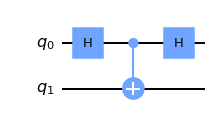

[ 0.5+0.000000e+00j  0.5+0.000000e+00j  0.5-6.123234e-17j
 -0.5+6.123234e-17j]


C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


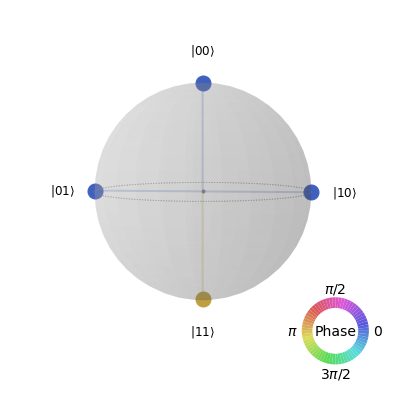

In [111]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.h(0)

display(qc.draw(output='mpl'))

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
svector = job.result().get_statevector(qc)
print(svector)

multi_draw(qc)


C:\Users\Μύρωνας\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


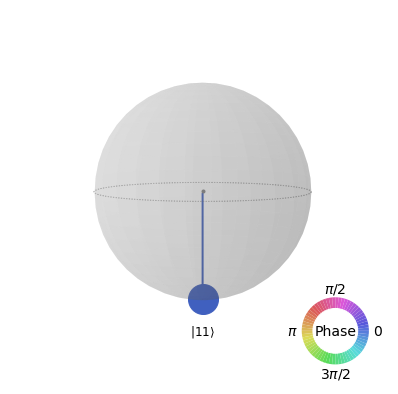

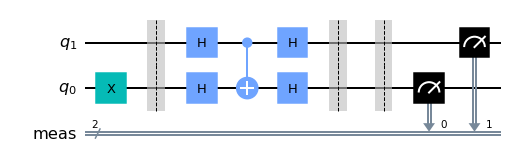

{'11': 100}


In [112]:
q =  QuantumRegister(2,"q")
qc = QuantumCircuit(q)

qc.x(q[0]) # set the down qubit to |1>

qc.barrier()

qc.h(q)
qc.cx(1,0)
qc.h(q)

multi_draw(qc)

qc.measure_all()

# draw the circuit in Qiskit reading order
display(qc.draw(output='mpl',reverse_bits=True))

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

## **Oracle**

In [96]:
def f(x):
    if x==1: return 1
    return 0


In [5]:
def Oracle(n=2):
    U = identity(2**n)

    x0 = 3 # The secret correct value
    U[x0][x0] = -1

    qc = QuantumCircuit(n)
    qc.unitary(U, range(n))
    return qc.to_gate(label="Oracle")


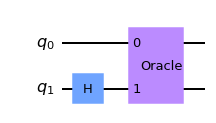

(0.7071067811865476+0j)
0j
(0.7071067811865476+0j)
(-0+0j)


In [7]:
qc = QuantumCircuit(2)

qc.h(1)

qc.append(Oracle(), qc.qubits)

display(qc.draw(output='mpl'))


# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('statevector_simulator'),shots=1)
sv = job.result().get_statevector(qc)
for el in sv: print(el)


## **Grover's Algorithm**

In [99]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

In [103]:
from math import asin, pi

# initial values
iteration = 5
N = 16
marked_elements = [0]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

x = elements[N-1] * ((N-k)**0.5)
y = elements[0] * (k**0.5)
states_on_unit_circle.append([x,y,"0"])

# Execute Grover's search algorithm for $iteration steps
for step in range(iteration):
    # query
    elements = query(elements,marked_elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step)+"'"])
    # inversion
    elements = inversion(elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step+1)])


# print the angles
print("angles in degree")
for state in states_on_unit_circle:
    print(asin(state[1])/pi*180, state)


angles in degree
14.477512185929923 [0.9682458365518543, 0.25, '0']
-14.477512185929923 [0.9682458365518543, -0.25, "0'"]
43.432536557789774 [0.7261843774138907, 0.6875, '1']
-43.432536557789774 [0.7261843774138907, -0.6875, "1'"]
72.38756092964962 [0.30257682392245444, 0.953125, '2']
-72.38756092964962 [0.30257682392245444, -0.953125, "2'"]
78.65741469849054 [-0.1966749355495954, 0.98046875, '3']
-78.65741469849054 [-0.1966749355495954, -0.98046875, "3'"]
49.702390326630685 [-0.6467579611342464, 0.7626953125, '4']
-49.702390326630685 [-0.6467579611342464, -0.7626953125, "4'"]
20.74736595477084 [-0.9351514964353358, 0.354248046875, '5']
